In [8]:
import pandas as pd
import os
from neo4j import GraphDatabase
# predefined functions
from create_coauthor import get_coauthor_matrix
from connect_to_neo4j import create_coauthor_graph, calculate_graph_stats_for_field, process_files_in_directory
import os

## Make Coauthor Matrix from WOS(Web of science) data

- use predefined function 'get_coauthor_matrix' to create coauthor matrix
- coauthor matrix is in dict form
- authors are represented as authorID to prevent namesake problem

In [3]:
df_lung_cancer = pd.read_excel('lung_cancer.xls')
coauthor_lung_cancer = get_coauthor_matrix(df_lung_cancer['Researcher Ids'])
coauthor_lung_cancer

defaultdict(<function create_coauthor.get_coauthor_matrix.<locals>.<lambda>()>,
            {'B-1277-2014': defaultdict(int,
                         {'AAC-5192-2020': 1,
                          'L-4554-2015': 1,
                          'H-8031-2014': 1,
                          'B-7157-2017': 1,
                          'N-9666-2013': 1,
                          'M-9715-2015': 1}),
             'AAC-5192-2020': defaultdict(int,
                         {'B-1277-2014': 1,
                          'L-4554-2015': 1,
                          'H-8031-2014': 1,
                          'B-7157-2017': 1,
                          'N-9666-2013': 1,
                          'M-9715-2015': 1}),
             'L-4554-2015': defaultdict(int,
                         {'B-1277-2014': 1,
                          'AAC-5192-2020': 1,
                          'H-8031-2014': 1,
                          'B-7157-2017': 1,
                          'N-9666-2013': 1,
                          '

In [4]:
coauthor_lung_cancer

defaultdict(<function create_coauthor.get_coauthor_matrix.<locals>.<lambda>()>,
            {'B-1277-2014': defaultdict(int,
                         {'AAC-5192-2020': 1,
                          'L-4554-2015': 1,
                          'H-8031-2014': 1,
                          'B-7157-2017': 1,
                          'N-9666-2013': 1,
                          'M-9715-2015': 1}),
             'AAC-5192-2020': defaultdict(int,
                         {'B-1277-2014': 1,
                          'L-4554-2015': 1,
                          'H-8031-2014': 1,
                          'B-7157-2017': 1,
                          'N-9666-2013': 1,
                          'M-9715-2015': 1}),
             'L-4554-2015': defaultdict(int,
                         {'B-1277-2014': 1,
                          'AAC-5192-2020': 1,
                          'H-8031-2014': 1,
                          'B-7157-2017': 1,
                          'N-9666-2013': 1,
                          '

## Connect to Neo4j Server

- we are going to connect to neo4j server using neo4j driver

In [3]:
uri ='bolt://localhost:7687'
user = 'neo4j'
password = '09150915'

driver = GraphDatabase.driver(uri, auth=(user,password))

In [7]:
# use predefined function 'create_coauthor_graph' to make graph to neo4j
nodes_written = create_coauthor_graph(coauthor_lung_cancer,'lung_cancer')
print('Number of Nodes Written : {}'.format(nodes_written))

Number of Nodes Written : 183


If you run this code, nodes will be created in your neo4j server :

![image](assets/node_count.png)
![image](assets/node_visual.png)


## Calculate statistics for graph

- calculate statistics for the created graph
- using neo4j graph data science library
- using the predefined function 'calculate_graph_stats_for_field'

In [8]:
stats = calculate_graph_stats_for_field('lung_cancer')

In [9]:
print(stats)

{'field': 'lung_cancer', 'num_authors': 183, 'num_authors_FastRP': 183, 'num_edges': 111, 'degree_centrality_max': 8.000053405761719, 'degree_centrality_mean': 0.6065591280577612, 'num_community': 127, 'num_authors_in_main_component': 20}


### Repeat process for Super conductor data

In [10]:
# Read File
df_super_conducter = pd.read_excel('super_conducter_science.xls')
# Get Coauthor Matrix
coauthor_super_conducter = get_coauthor_matrix(df_super_conducter['Researcher Ids'])
# Create Coauthor Graph
create_coauthor_graph(coauthor_super_conducter,'super_conducter')
# Calculate Stats for Graph
stats_super_conductor = calculate_graph_stats_for_field('super_conducter')
print(stats_super_conductor)

{'field': 'super_conducter', 'num_authors': 224, 'num_authors_FastRP': 224, 'num_edges': 188, 'degree_centrality_max': 16.00011444091797, 'degree_centrality_mean': 0.8392881665910993, 'num_community': 173, 'num_authors_in_main_component': 30}


In [22]:
stats_super_conductor.keys()

dict_keys(['field', 'num_authors', 'num_authors_FastRP', 'num_edges', 'degree_centrality_max', 'degree_centrality_mean', 'num_community', 'num_authors_in_main_component'])

In [ ]:
def calculate_stats_field(file_names):
    for file in file_names :
        df = read_excel('file',)

In [12]:
import glob
# Folder path
folder_path = '/Users/jiyounglim/Documents/study/공종설 네트워크 분석/files_analyze/civilEngineering'

# Read all CSV files and create dataframes
csv_files = glob.glob(folder_path + '/*.csv')

dataframes = {}
for file_path in csv_files:
    file_name = file_path.split('/')[-1].split('.')[0]  # Extract the file name without extension
    df = pd.read_csv(file_path, low_memory=False)
    dataframes[file_name] = df

In [19]:
dataframes.keys()

dict_keys(['civilEngineering-df_GeoTechnicalEngineering', 'civilEngineering-df_asphalt', 'civilEngineering-df_Transportation', 'civilEngineering-df_concreteScience', 'civilEngineering-df_testingMaintanance'])

In [21]:
'civilEngineering-df_GeoTechnicalEngineering'.split('_')[1]

'GeoTechnicalEngineering'

In [31]:
df_civil_stats = pd.DataFrame(index = ['field', 'num_authors', 'num_authors_FastRP', 'num_edges', 'degree_centrality_max', 'degree_centrality_mean', 'num_community', 'num_authors_in_main_component'])

stats_list =list()
for key,df in dataframes.items() :
    coauthor = get_coauthor_matrix(df['Researcher Ids'])
    create_coauthor_graph(coauthor,key.split('_')[1])
    stats = calculate_graph_stats_for_field(key.split('_')[1])

    stats_list.append(stats)


In [32]:
stats_list

[{'field': 'GeoTechnicalEngineering',
  'num_authors': 704,
  'num_authors_FastRP': 704,
  'num_edges': 236,
  'degree_centrality_max': 12.000053405761719,
  'degree_centrality_mean': 0.3352281288667159,
  'num_community': 517,
  'num_authors_in_main_component': 25},
 {'field': 'asphalt',
  'num_authors': 517,
  'num_authors_FastRP': 517,
  'num_edges': 328,
  'degree_centrality_max': 10.000053405761719,
  'degree_centrality_mean': 0.6344310531763782,
  'num_community': 284,
  'num_authors_in_main_component': 42},
 {'field': 'Transportation',
  'num_authors': 828,
  'num_authors_FastRP': 828,
  'num_edges': 314,
  'degree_centrality_max': 10.000053405761719,
  'degree_centrality_mean': 0.37922801142153534,
  'num_community': 604,
  'num_authors_in_main_component': 17},
 {'field': 'concreteScience',
  'num_authors': 2640,
  'num_authors_FastRP': 2640,
  'num_edges': 2446,
  'degree_centrality_max': 28.00011444091797,
  'degree_centrality_mean': 0.9265175414807869,
  'num_community': 121

In [33]:
df_civil = pd.DataFrame(stats_list)

In [35]:
df_civil.head()

,field,num_authors,num_authors_FastRP,num_edges,degree_centrality_max,degree_centrality_mean,num_community,num_authors_in_main_component
0,GeoTechnicalEngineering,704,704,236,12.000053,0.335228,517,25
1,asphalt,517,517,328,10.000053,0.634431,284,42
2,Transportation,828,828,314,10.000053,0.379228,604,17
3,concreteScience,2640,2640,2446,28.000114,0.926518,1218,173
4,testingMaintanance,662,662,261,9.000053,0.394261,490,26


<Axes: >

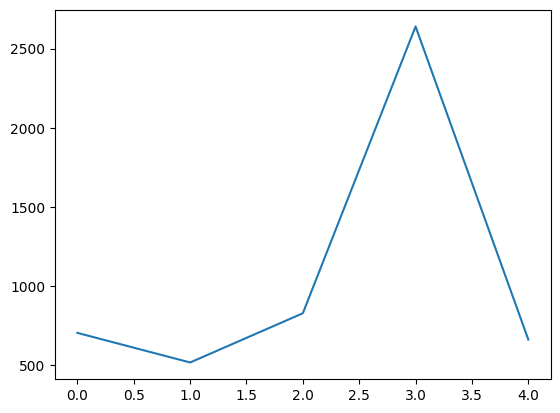

In [36]:
import matplotlib.pyplot as plt

df_civil['num_authors_FastRP'].plot()


IndexError: index 4 is out of bounds for axis 0 with size 4

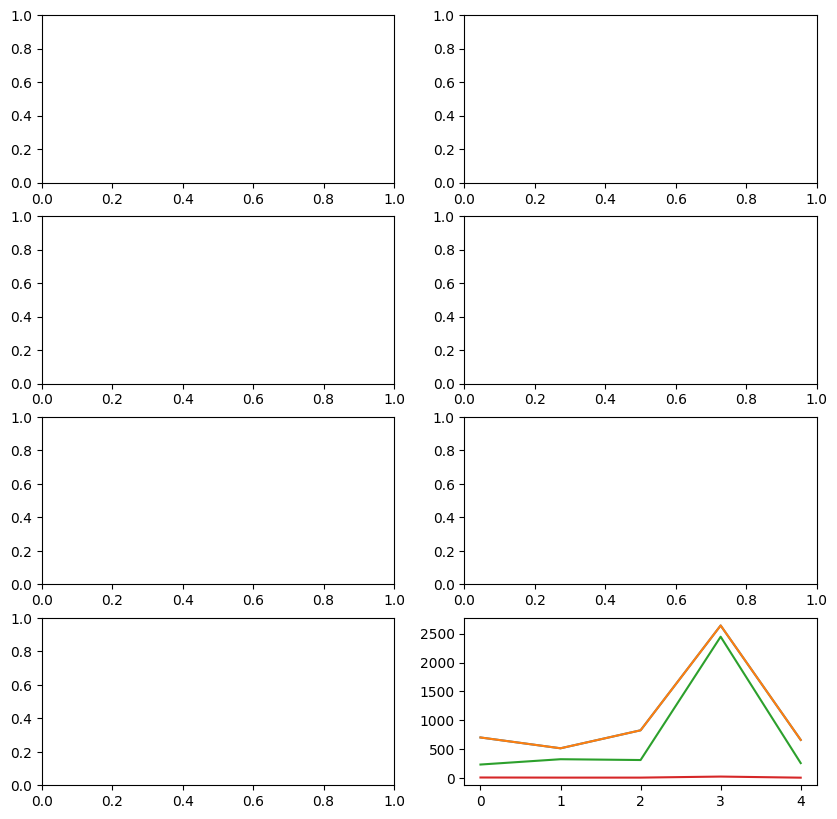

In [40]:
cols = ['num_authors', 'num_authors_FastRP', 'num_edges',
          'degree_centrality_max', 'degree_centrality_mean', 'num_community',
          'num_authors_in_main_component']
fig, ax = plt.subplots(4,2, figsize=(10,10))
for i, col in enumerate(cols) :

    ax[i+1] = plt.plot(df_civil[col])

plt.show()

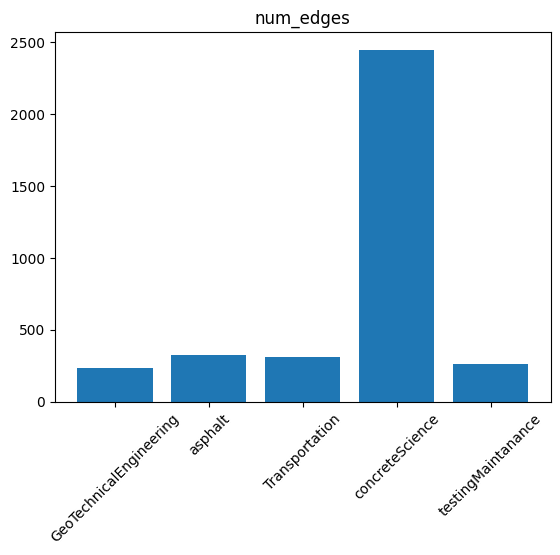

In [56]:
plt.title('num_edges')
plt.bar(df_civil['field'],df_civil['num_edges'])
plt.xticks(rotation=45)

plt.show()


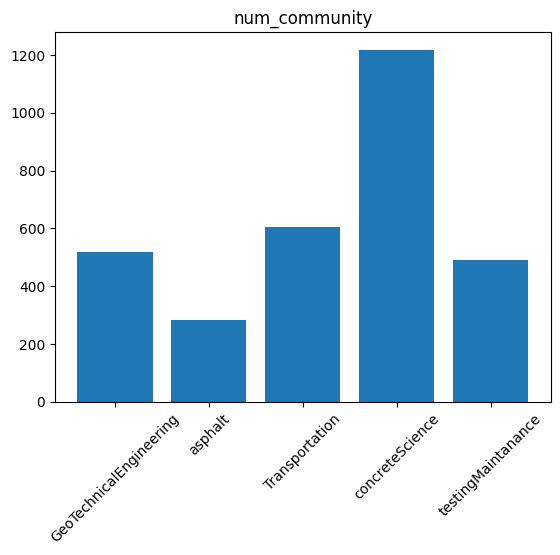

In [47]:
plt.title('num_community')
plt.bar(df_civil['field'],df_civil['num_community'])
plt.xticks(rotation=45)

plt.show()

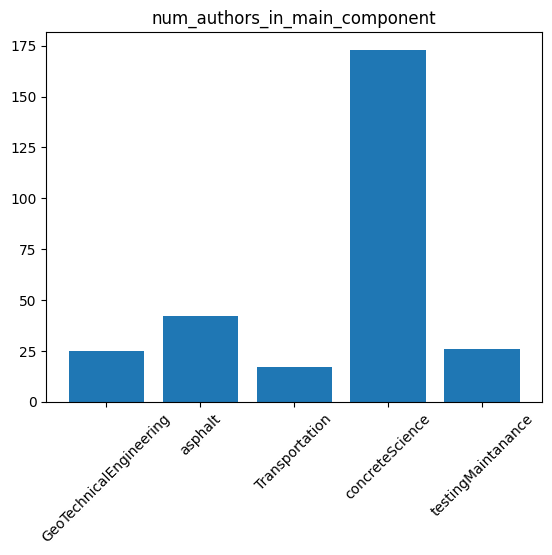

In [48]:
plt.title('num_authors_in_main_component')
plt.bar(df_civil['field'],df_civil['num_authors_in_main_component'])
plt.xticks(rotation=45)

plt.show()

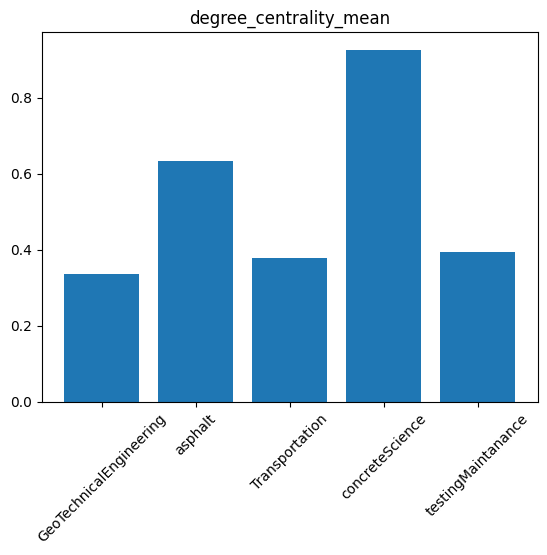

In [55]:
plt.title('degree_centrality_mean')
plt.bar(df_civil['field'],df_civil['degree_centrality_mean'])
plt.xticks(rotation=45)

plt.show()

In [53]:
df_civil.head()

,field,num_authors,num_authors_FastRP,num_edges,degree_centrality_max,degree_centrality_mean,num_community,num_authors_in_main_component
0,GeoTechnicalEngineering,704,704,236,12.000053,0.335228,517,25
1,asphalt,517,517,328,10.000053,0.634431,284,42
2,Transportation,828,828,314,10.000053,0.379228,604,17
3,concreteScience,2640,2640,2446,28.000114,0.926518,1218,173
4,testingMaintanance,662,662,261,9.000053,0.394261,490,26


In [52]:
df_civil.to_csv('civil.csv')

In [10]:
directory = '/Users/jiyounglim/Documents/study/공종설 네트워크 분석/files_analyze'
stats_all = process_files_in_directory(directory)

stats_all.head()

NameError: name 'os' is not defined

In [4]:
query = """
CALL gds.degree.stream('myGraph')
YIELD nodeId, score
RETURN score AS degree_centrality, count(*) AS count
ORDER BY degree_centrality
"""

with driver.session() as session:
    result = session.run(query)
    df = pd.DataFrame(result)
    print(df)

ClientError: {code: Neo.ClientError.Procedure.ProcedureCallFailed} {message: Failed to invoke procedure `gds.degree.stream`: Caused by: java.util.NoSuchElementException: Graph with name `myGraph` does not exist on database `neo4j`. It might exist on another database.}

In [13]:
import os

In [14]:
def project_graph(field):
    # project field network to gds library
    with driver.session() as session :
        session.run(f'''
        CALL gds.graph.project.cypher(
            '{field}',
            'MATCH (a:Author {{field: "{field}"}}) RETURN id(a) AS id',
            'MATCH (n)-[r:COAUTHOR]->(m) RETURN id(n) AS source, id(m) AS target',
            {{validateRelationships:False}})
        YIELD graphName AS graph, nodeQuery, nodeCount AS nodes, relationshipQuery, relationshipCount AS rels''')

    num_nodes = result.single()['nodes']

    return num_nodes